# EDA (Exploratory Data Analysis)

In [2]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [120]:
#Reading the data
data = pd.read_excel('FA Analysis_Rocket.xlsx')

In [9]:
#No of columns
len(data.columns)

118

In [11]:
#No of rows
len(data)

4186

In [13]:
#Widening the display of columns so as to see all the 120 columns
pd.options.display.max_columns = 150

In [12]:
#Quick glance of the dataset
data.head()

,FA Details-FAID,FA Details-I-LOS,FA Details-Rocket-LOS,FA Details-I-LOS Band,FA Details-Rocket-LOS Band,FA Details-Sig Team.,FA Details-Teaming Flag,FA Details-Rec. Council 2018,FA Details-Rocket Lifecycle Stage,FA Details-Yrs. Left on EFL (Feb 2018),FA Details-Production Quintile,FA Details-T12 (Feb 2018),FA Details-AuM YE 17,FA Details-AuM YE Band,Branch Detail-Branch Wire,Branch Detail-Division,Product Mix (Rev)-Advisory %,Product Mix (Rev)-Alts.,Product Mix (Rev)-BANKING,Product Mix (Rev)-CREDIT LINE,Product Mix (Rev)-EQUITIES,Product Mix (Rev)-INSURANCE / ANNUITIES,Product Mix (Rev)-LENDING,Product Mix (Rev)-MISCELLANEOUS,Product Mix (Rev)-MUNICIPALS,Product Mix (Rev)-MF and UIT,Product Mix (Rev)-OTHER,Product Mix (Rev)-STRUCTURED PROD,Product Mix (Rev)-TAXABLE FIXED I,Product Mix (Rev)-ADVISORY,Product Mix (Rev)-Alts..1,Product Mix (Rev)-BANKING.1,Product Mix (Rev)-CREDIT LINE.1,Product Mix (Rev)-EQUITIES.1,Product Mix (Rev)-INSURANCE / ANNUITIES.1,Product Mix (Rev)-LENDING.1,Product Mix (Rev)-MISCELLANEOUS.1,Product Mix (Rev)-MUNICIPALS.1,Product Mix (Rev)-MF and UIT.1,Product Mix (Rev)-OTHER.1,Product Mix (Rev)-STRUCTURED PROD.1,Product Mix (Rev)-TAXABLE FIXED I.1,Product Mix (Assets)-Wrap %,Product Mix (Assets)-CASH,Product Mix (Assets)-COMMODITIES,Product Mix (Assets)-EQUITY,Product Mix (Assets)-FIXED INCOME,Product Mix (Assets)-NON-TRADITIONAL,Product Mix (Assets)-OTHER,Product Mix (Assets)-OUTSIDE,Product Mix (Assets)-PB ASSET,Product Mix (Assets)-THIRD PARTY,Product Mix (Assets)-Wrap,Product Mix (Assets)-CASH .1,Product Mix (Assets)-COMMODITIES.1,Product Mix (Assets)-EQUITY.1,Product Mix (Assets)-FIXED INCOME.1,Product Mix (Assets)-NON-TRADITIONAL.1,Product Mix (Assets)-OTHER.1,Product Mix (Assets)-OUTSIDE.1,Product Mix (Assets)-PB ASSET.1,Product Mix (Assets)-THIRD PARTY.1,Product Penetration-H/UHNW MHHs with 4+ Products (%),Product Penetration-H/UHNW MHHs with 4+ Products (#),Client Acquisition Details-QNR 2015,Client Acquisition Details-QNR 2016,Client Acquisition Details-QNR 2017,Client Acquisition Details-3 year cumm. QNR,Client Acquisition Details-$1M+ QNR's 2015,Client Acquisition Details-$1M+ QNR's 2016,Client Acquisition Details-$1M+ QNR's 2017,Client Acquisition Details-3 year cumm. $1m+ QNR,Client Acquisition Details-YTD $1m+ QNRs (March-2018),Net New Money Details-FA Comp. NNM 2014,Net New Money Details-FA Comp. NNM 2015,Net New Money Details-FA Comp. NNM 2016,Net New Money Details-FA Comp. NNM 2017,Net New Money Details-Magnitude of 2017 Growth,Net New Money Details-# of NNM Years +,Net New Money Details-Rate of Increase / decrease,Net New Money Details-2017 Break in NNM,Net New Money Details-Color,Net New Money Details-Identifier,Net New Money Details-YTD NNM (March-2018),Maketing Details-FA Web,Maketing Details-Page Views,Maketing Details-FA Social,Maketing Details-News Feed Activity,Maketing Details-Total AMC orders (12 month),Wealth/Financial Planning -Total MHHs,Wealth/Financial Planning -MHHs with a Plan,Wealth/Financial Planning -Total MHH Planning %,Wealth/Financial Planning -H/UHNW MHH Planning %,Client Retention-% of Attrited MHHs (2017 - Post Split),Digital Tools-% of MHHs on OLS,-% of MHHs on MTP,-# accts enrolled in MTP,-Outside Assets in MTP,Banking and Lending-Cr Cards: H/UHNW MHHs Active CCs (%),Banking and Lending-Cr Cards: H/UHNW MHHs Active CCs ( #),Banking and Lending-Mortgages: H/UHNW MHHs w/ Rocket Jumbo (%),Banking and Lending-Mortgages: H/UHNW MHHs w/ Rocket Jumbo (#),Banking and Lending-SBL: H/UHNW MHHs Approved CLs (%),Banking and Lending-SBL: H/UHNW MHHs Approved CLs (#),Banking and Lending-SBL: H/UHNW MHHs Utilized CLs (%),Banking and Lending-SBL: H/UHNW MHHs Utilized CLs (#),Client Age Distribution (% of MHHs by Age)-<45 yrs.,Client Age Distribution (% of MHHs by Age)-45-54 yrs.,Client Age Distribution (% of MHHs by Age)-55-64 yrs.,Client Age Distribution (% of MHHs by Age)-65-74 yrs.,Client Age Distribution (% of MHHs by Age)-75+ yrs.,Segment Index Score (All FA Score)-A

### <font color='green'>Target variable here is "Net New Money Details-YTD NNM \n(March-2018)"</font>

In [130]:
# Defining target variable + data cleaning

data['target']   = data["Net New Money Details-YTD NNM \n(March-2018)"].replace('-', '0').astype(float)

In [80]:
# Creating new columns in data for easy reusability + data cleaning

data['NNM2014'] =data['Net New Money Details-FA Comp. NNM 2014'].replace('  ', 0).astype(float)
data['NNM2015'] =data['Net New Money Details-FA Comp. NNM 2015'].replace(' ', 0).astype(float)
data['NNM2016'] =data['Net New Money Details-FA Comp. NNM 2016'].replace(' ', 0).astype(float)
data['NNM2017'] =data['Net New Money Details-FA Comp. NNM 2017'].astype(float)

# Analysis of trends in NNM Year by Year

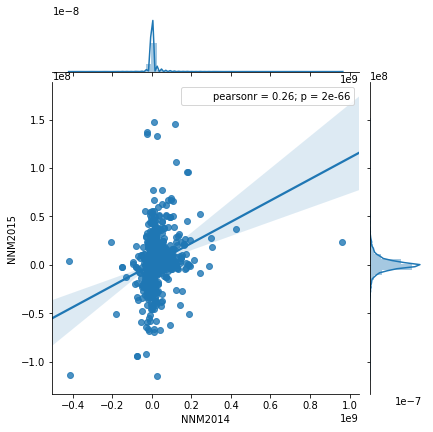

In [31]:
# Comparing the NNM of 2014 with the NNM 2015

sns.jointplot(x="NNM2014", y="NNM2015", data =data ,  kind="reg" )
plt.show()

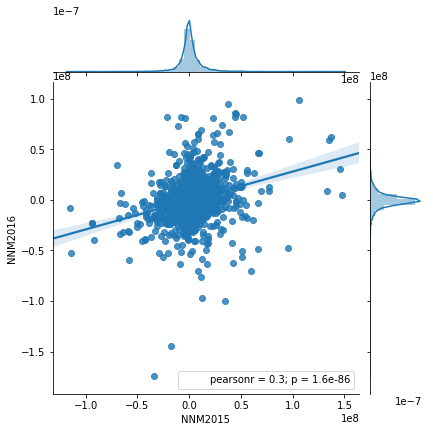

In [32]:
# Comparing the NNM of 2015 with the NNM 2016

sns.jointplot(x="NNM2015", y="NNM2016", data =data ,  kind="reg" )
plt.show()

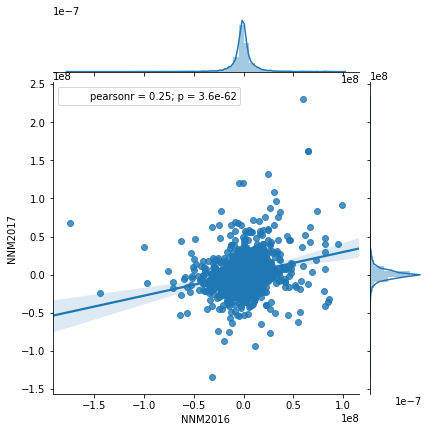

In [33]:
# Comparing the NNM of 2016 with the NNM 2017

sns.jointplot(x="NNM2016", y="NNM2017", data =data ,  kind="reg" )
plt.show()

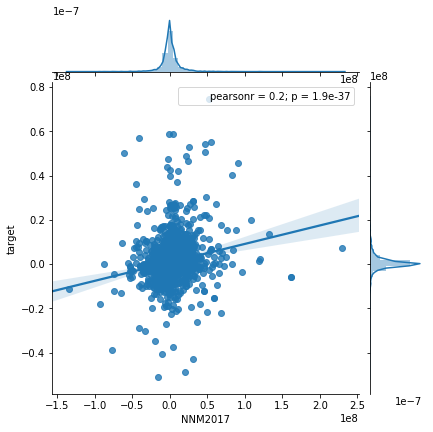

In [34]:
# Comparing the NNM of 2017 with the NNM 2018 YTD(year to date)

sns.jointplot(x="NNM2017", y="target", data =data ,  kind="reg" )
plt.show()

In [39]:
# sum af all previous NNM
data['NNM_sum'] = data[ ['NNM2014' ,'NNM2015' , 'NNM2016' ,'NNM2017']].sum(axis = 1)

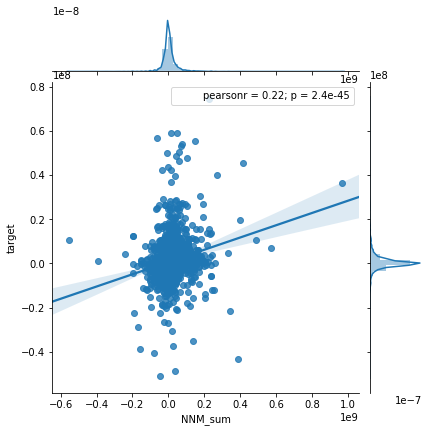

In [43]:
# checking the infuence of NNM_sum with target
sns.jointplot(x="NNM_sum", y="target", data =data ,  kind="reg" )
plt.show()

# Analysis of FA details (features) influence on the target

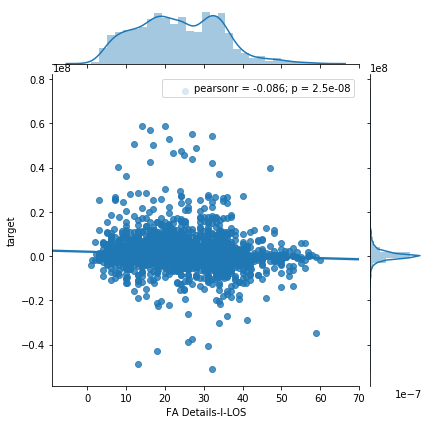

In [68]:
# Comparing the FA I LOS with the target
sns.jointplot(x="FA Details-I-LOS", y="target", data =data ,  kind="reg" )
plt.show()

### <font color='red'>Observation: -ve correaltion shows --> with increase in Industry length of service(I LOS) NNM decreases</font>

In [67]:
# Seeing the different bands and their counts
data['FA Details-I-LOS Band'].value_counts()

 3.372394e+05    763
 1.285365e+06    692
 1.430198e+06    645
 1.054570e+06    514
 1.106159e+06    499
 1.179803e+06    422
-2.364953e+05    365
-7.118092e+05    224
 6.795872e+05     62
Name: FA Details-I-LOS Band, dtype: int64

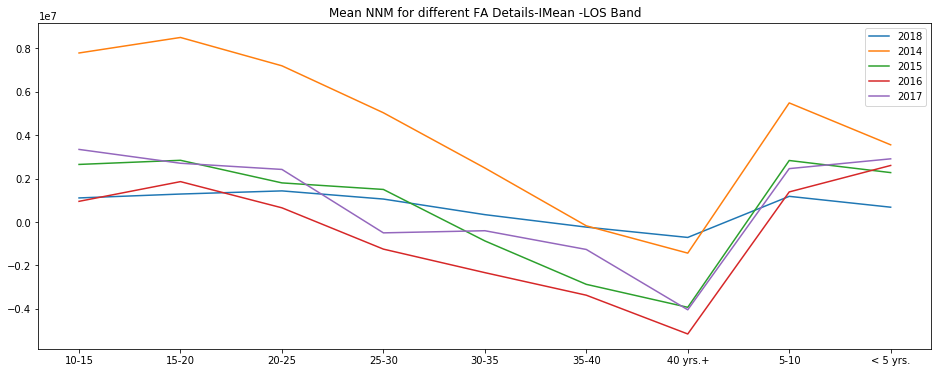

In [47]:
#Grouping by Industry Length of Service and ploting the means of different NNM years

plt.figure( figsize = (16,6))
plt.plot(data.groupby('FA Details-I-LOS Band')['target'].mean() , label = '2018')
plt.plot(data.groupby('FA Details-I-LOS Band')['NNM2014'].mean() ,  label = '2014')
plt.plot(data.groupby('FA Details-I-LOS Band')['NNM2015'].mean() ,  label = '2015')
plt.plot(data.groupby('FA Details-I-LOS Band')['NNM2016'].mean() ,  label = '2016')
plt.plot(data.groupby('FA Details-I-LOS Band')['NNM2017'].mean() ,  label = '2017')
plt.title('Mean NNM for different FA Details-IMean -LOS Band')
plt.legend()

In [50]:
#sorting results of 2017 year
data.groupby('FA Details-I-LOS Band')['NNM2017'].mean().sort_values()

FA Details-I-LOS Band
40 yrs.+   -4.041391e+06
35-40      -1.265476e+06
25-30      -5.012070e+05
30-35      -4.028784e+05
20-25       2.417895e+06
5-10        2.455194e+06
15-20       2.702601e+06
< 5 yrs.    2.905909e+06
10-15       3.338870e+06
Name: NNM2017, dtype: float64

### <font color='red'>Observation: <br>1) FA with FA Details-I-LOS Band = 10-15 years show best results <br> 2) FA in 40 years I-LOS Band have the worst result</font>

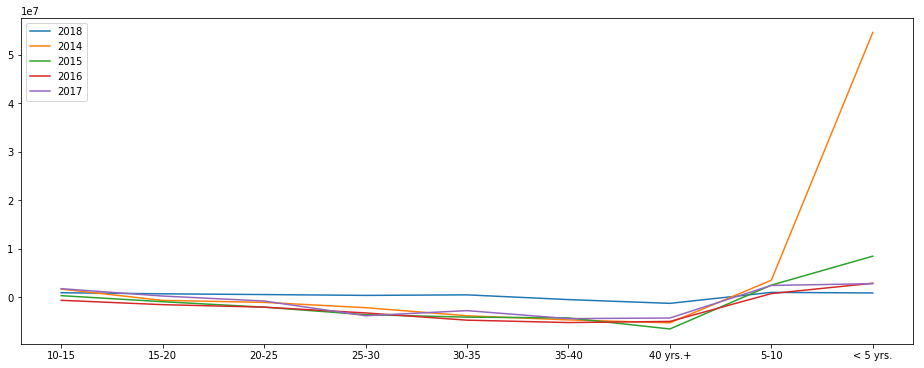

In [61]:
#Grouping by Rocket(particular to the bank) Length of Service and ploting the means of different NNM years

plt.figure( figsize = (16,6))
plt.plot(data.groupby('FA Details-Rocket-LOS Band')['target'].mean() , label = '2018')
plt.plot(data.groupby('FA Details-Rocket-LOS Band')['NNM2014'].mean() ,  label = '2014')
plt.plot(data.groupby('FA Details-Rocket-LOS Band')['NNM2015'].mean() ,  label = '2015')
plt.plot(data.groupby('FA Details-Rocket-LOS Band')['NNM2016'].mean() ,  label = '2016')
plt.plot(data.groupby('FA Details-Rocket-LOS Band')['NNM2017'].mean() ,  label = '2017')
plt.legend()

### <font color='red'>Observation: FA shows decreasing NNM trend with increase in length of service</font>

In [78]:
# FA Rocket lifecycle category counts

data['FA Details-Rocket Lifecycle Stage'].value_counts()

Recruits with >1 to <5 Yrs Left on EFL                    1943
Recruits with <1 Yr Left on EFL to <1 Yr Past EFL Exp.    1207
Recruits >1 Yr to <5 Yrs Past EFL Expiration               241
Recruits >=5 Yrs Left on EFL                               218
Recruits >=5 Yrs Past EFL Expiration                       198
Home Grown FA <10 Yrs Rocket LOS                           182
Home Grown FA >=10 Yrs Rocket LOS                          155
FA >=35 Yrs Industry LOS                                    29
TFAP                                                        13
Name: FA Details-Rocket Lifecycle Stage, dtype: int64

In [71]:
# FA Rocket lifecycle category grouped for mean calculation of target variable
data.groupby(['FA Details-Rocket Lifecycle Stage'])['target'].mean().sort_values()

FA Details-Rocket Lifecycle Stage
FA >=35 Yrs Industry LOS                                 -7.329262e+05
TFAP                                                     -6.024746e+05
Home Grown FA >=10 Yrs Rocket LOS                        -3.404159e+02
Recruits >1 Yr to <5 Yrs Past EFL Expiration              5.267928e+05
Recruits with <1 Yr Left on EFL to <1 Yr Past EFL Exp.    8.166083e+05
Recruits >=5 Yrs Past EFL Expiration                      8.776598e+05
Home Grown FA <10 Yrs Rocket LOS                          8.959585e+05
Recruits with >1 to <5 Yrs Left on EFL                    9.014280e+05
Recruits >=5 Yrs Left on EFL                              1.310788e+06
Name: target, dtype: float64

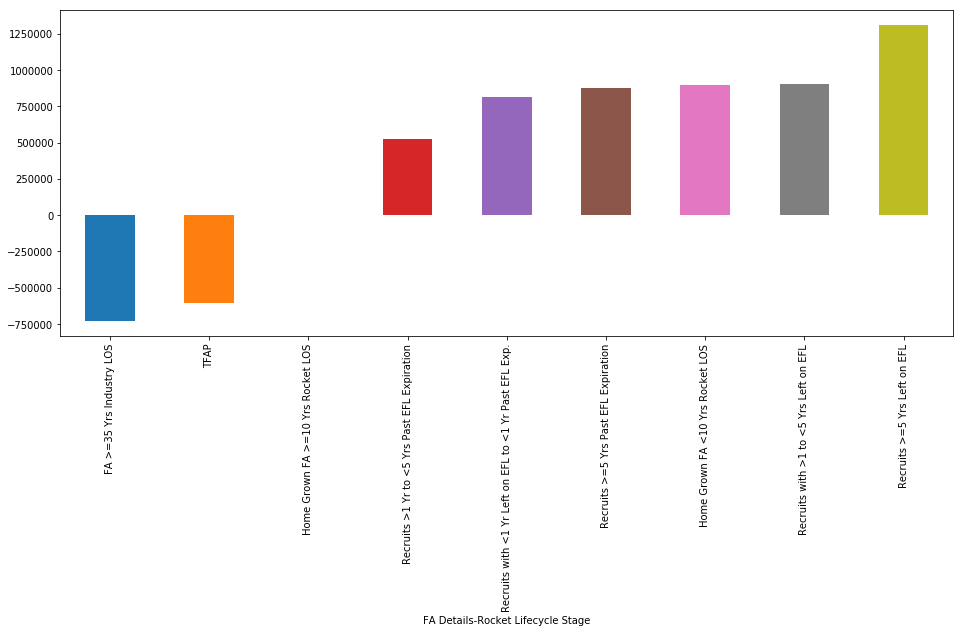

In [72]:
# Visualisation of the result from above cell

plt.figure( figsize = (16,6))
data.groupby(['FA Details-Rocket Lifecycle Stage'])['target'].mean().sort_values().plot.bar()
plt.show()

In [74]:
# FA Assests under Management(Year End) category counts

data['FA Details-AuM YE Band'].value_counts()

$150m-$200m    644
$75m-$100m     507
$100m-$125m    488
$50m-75m       479
$125m-$150m    456
>$350m         416
<$50m          401
$200m-$250m    399
$250m-$350m    396
Name: FA Details-AuM YE Band, dtype: int64

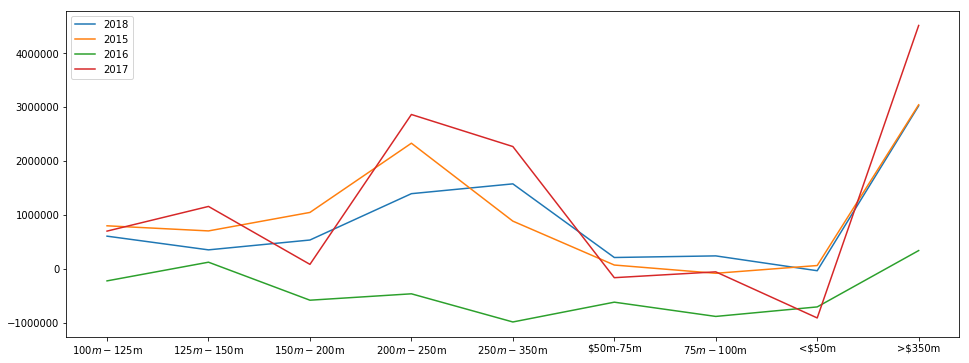

In [75]:
# Visualisation of grouping by - AuM YE Band to the means of the NNM values

plt.figure( figsize = (16,6))
plt.plot(data.groupby('FA Details-AuM YE Band')['target'].mean() , label = '2018')
plt.plot(data.groupby('FA Details-AuM YE Band')['NNM2015'].mean() ,  label = '2015')
plt.plot(data.groupby('FA Details-AuM YE Band')['NNM2016'].mean() ,  label = '2016')
plt.plot(data.groupby('FA Details-AuM YE Band')['NNM2017'].mean() ,  label = '2017')
plt.legend()

### <font color ='red'> Observation: Generally FA with assests of worth 150m-350m worth under them bring more money </font>

# Analysis of Client acquisition details features influence on the target

In [89]:
# Cleaning of the columns [(QNR)=(Qualified New Relationship)]

data['Client Acquisition Details-QNR 2015'] =data['Client Acquisition Details-QNR 2015'].replace(' ', 0).astype(float)
data['Client Acquisition Details-QNR 2016'] =data['Client Acquisition Details-QNR 2016'].replace(' ', 0).astype(float)
data['Client Acquisition Details-QNR 2017'] =data['Client Acquisition Details-QNR 2017'].replace(' -   ', 0).astype(float)
data['Client Acquisition Details-3 year cumm. QNR'] =data['Client Acquisition Details-3 year cumm. QNR'].astype(float)
data["Client Acquisition Details-$1M+ QNR's 2015"] = data["Client Acquisition Details-$1M+ QNR's 2015"].replace(' ', 0 ).astype(float)
data["Client Acquisition Details-$1M+ QNR's 2016"] = data["Client Acquisition Details-$1M+ QNR's 2016"].replace(' ', 0 ).astype(float)
data["Client Acquisition Details-$1M+ QNR's 2017"] = data["Client Acquisition Details-$1M+ QNR's 2017"].replace(' ', 0 ).astype(float)
data["Client Acquisition Details-YTD $1m+ QNRs (March-2018)"] = data["Client Acquisition Details-YTD $1m+ QNRs (March-2018)"].replace('-' , 0).astype(float)

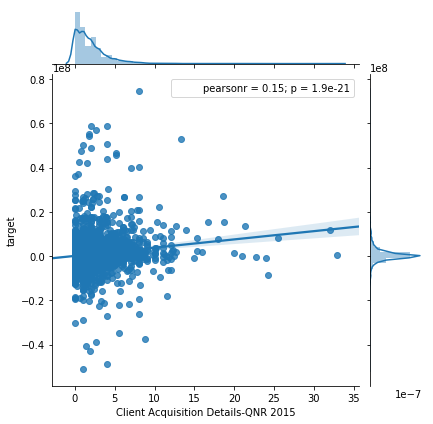

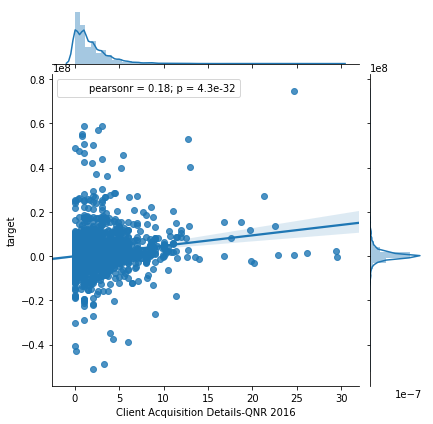

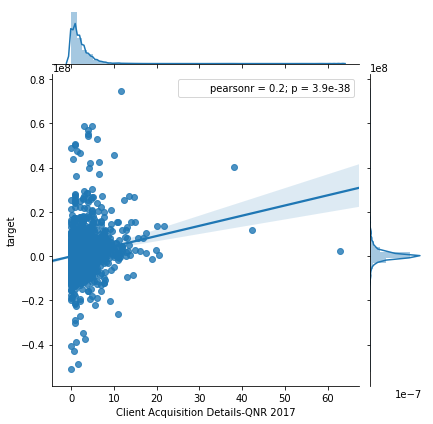

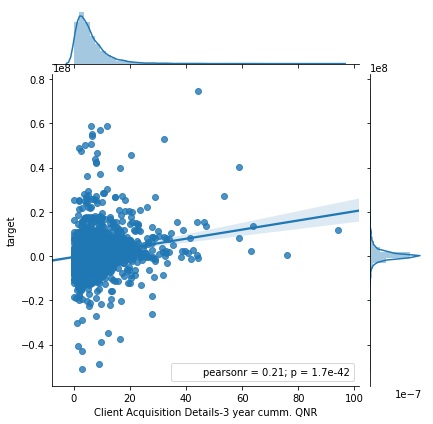

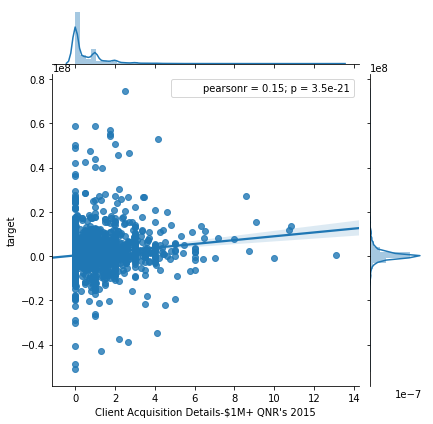

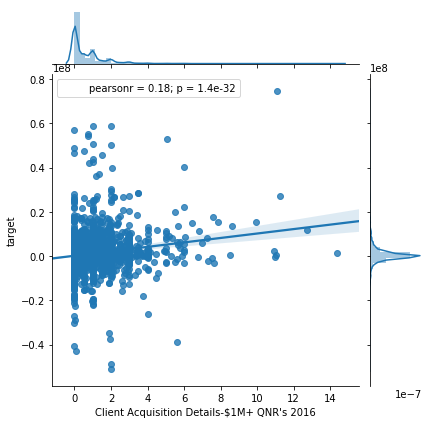

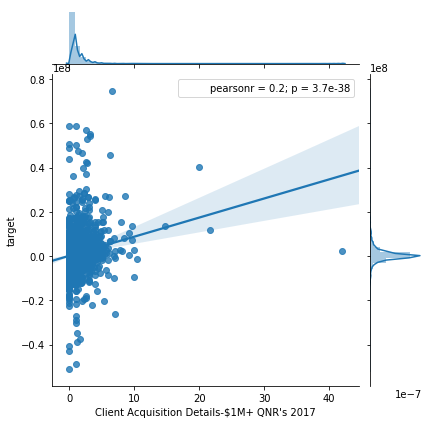

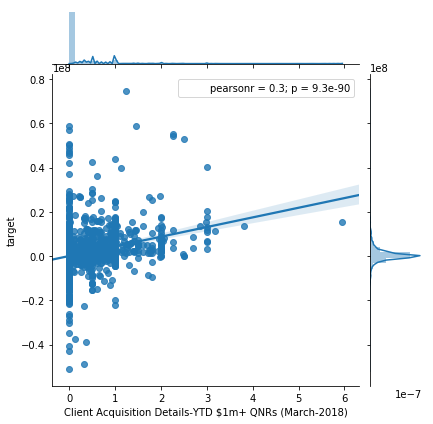

In [90]:
# Checking the "correlation" of the client acquisition details features with the target variable

client_acq_details_li = ['Client Acquisition Details-QNR 2015','Client Acquisition Details-QNR 2016',
                        'Client Acquisition Details-QNR 2017','Client Acquisition Details-3 year cumm. QNR',
                        "Client Acquisition Details-$1M+ QNR's 2015","Client Acquisition Details-$1M+ QNR's 2016",
                        "Client Acquisition Details-$1M+ QNR's 2017","Client Acquisition Details-YTD $1m+ QNRs (March-2018)"] 

for val in client_acq_details_li:
    sns.jointplot(x=val, y='target', data =data ,  kind="reg" )
    plt.show()

### <font color ='red'> Observation: All the client acquisition variables show positive correaltion</font>

# Analysis of Marketing details of the FA

In [93]:
# Exploring the 'Maketing Details-FA Web' variable
data['Maketing Details-FA Web'].value_counts()

1    3797
0     351
-      38
Name: Maketing Details-FA Web, dtype: int64

In [94]:
# Converting the cells where data is not available to -1
data['Maketing Details-FA Web'] = data['Maketing Details-FA Web'].replace('-', -1).astype(float)

In [96]:
# Grouping the Marketing details FA web and seeing the mean of target varialbe
data.groupby(['Maketing Details-FA Web'])['target'].mean().sort_values()

Maketing Details-FA Web
 0.0   -182562.684473
-1.0    530923.840789
 1.0    922158.370192
Name: target, dtype: float64

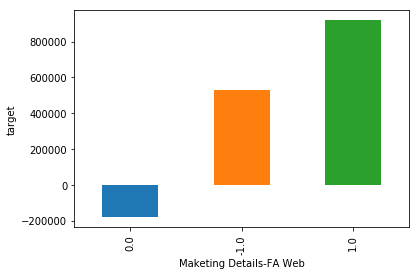

In [97]:
# Graph representation of the above result
data.groupby(['Maketing Details-FA Web'])['target'].mean().sort_values().plot.bar()
plt.ylabel('target')
plt.show()

### <font color ='red'> Observation: FA not on FA web are worst performer</font>

In [100]:
# Converting the cells where data is not available to -1
data['Maketing Details-FA Social'] = data['Maketing Details-FA Social'].replace('-',-1).astype(float)

In [102]:
# Exploring the 'Maketing Details-FA Social' variable
data['Maketing Details-FA Social'].value_counts()

 1.0    3014
 0.0    1134
-1.0      38
Name: Maketing Details-FA Social, dtype: int64

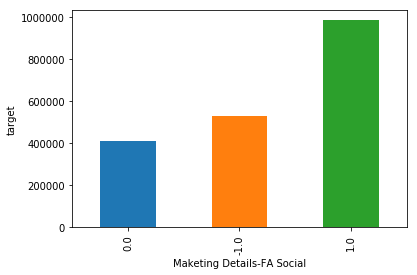

In [104]:
# Visualizing the marketing details FA social variable effect on target variable
data.groupby(['Maketing Details-FA Social'])['target'].mean().sort_values().plot.bar()
plt.ylabel('target')
plt.show()

In [107]:
# Cleaning the 'Maketing Details-FA Social' column
data['Maketing Details-FA Social'] = data['Maketing Details-FA Social'].replace('-',-1).astype(float)

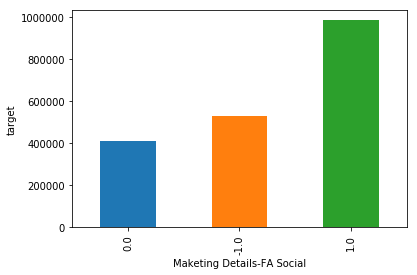

In [108]:
# Visualizing the FA social data 

data.groupby(['Maketing Details-FA Social'])['target'].mean().sort_values().plot.bar()
plt.ylabel('target')
plt.show()

### <font color ='red'> Observation: FA not on social media are worst performer</font>

# Segment Index Score (All FA Score)

In [128]:
# Segment Index score column cleaning
data['Segment Index Score (All FA Score)-Advisory Score'] = data['Segment Index Score (All FA Score)-Advisory Score'].replace('-',0).astype(float)
data['Segment Index Score (All FA Score)-Client Retention'] = data['Segment Index Score (All FA Score)-Client Retention'].replace('-',0).astype(float)
data['Segment Index Score (All FA Score)-Marketing Score'] = data['Segment Index Score (All FA Score)-Marketing Score'].replace('-',0).astype(float)
data['Segment Index Score (All FA Score)-Planning Score'] = data['Segment Index Score (All FA Score)-Planning Score'].replace('-',0).astype(float)
data['Segment Index Score (All FA Score)-Client Acquisition Score'] = data['Segment Index Score (All FA Score)-Client Acquisition Score'].replace('-',0).astype(float)

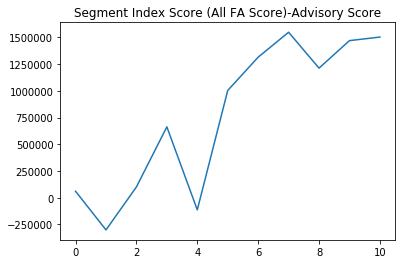

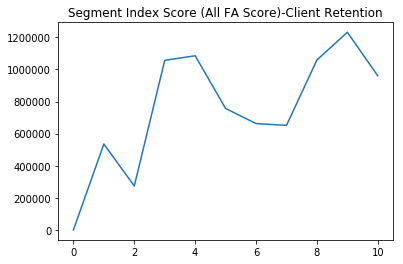

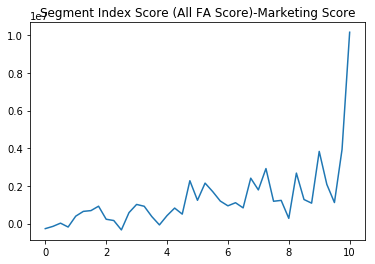

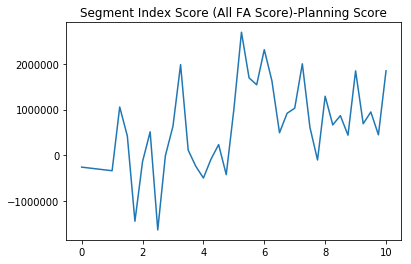

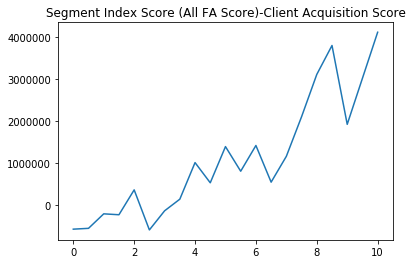

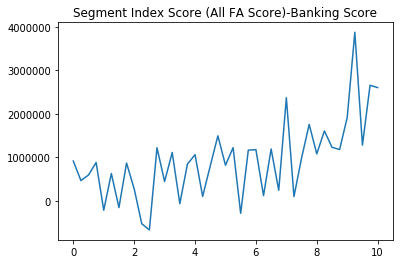

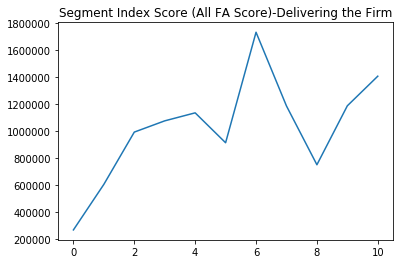

In [133]:
# Plotting of the grouped mean by different Segment Index score for target

seg_index_li =['Segment Index Score (All FA Score)-Advisory Score','Segment Index Score (All FA Score)-Client Retention',
              'Segment Index Score (All FA Score)-Marketing Score','Segment Index Score (All FA Score)-Planning Score',
              'Segment Index Score (All FA Score)-Client Acquisition Score','Segment Index Score (All FA Score)-Banking Score',
              'Segment Index Score (All FA Score)-Delivering the Firm']
for val in seg_index_li:
    plt.plot(data.groupby(val)['target'].mean())
    plt.title(val)
    plt.show()

### <font color ='red'> Observation: All features in the segment index score show positive correlation</font>